<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons%20/basics/lesson3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, engine='auto',
                     storage_options=None, columns=['tip_amount'])

df.head()

/tmp/ipython-input-95-2647345103.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  df = pd.read_parquet('./yellow_tripdata_2021-05.parquet', use_nullable_dtypes=False, engine='auto',


,tip_amount
0,2.20
1,0.00
2,0.00
3,3.06
4,5.79


In [ ]:
df.sum().sum()

np.float64(5523836.039999996)

In [ ]:
#naive way to reduce outliers
df.query("tip_amount > 0 & tip_amount <= 25", inplace=True)
df.sum().sum()

np.float64(5475099.320000002)

In [ ]:
#experiment

df_mean = df['tip_amount'].mean()
df_mode = df['tip_amount'].mode()
df_median = df['tip_amount'].median()
df_skew = df['tip_amount'].skew()

means = []

print(f'--- Mean = {df_mean} ---')

for i in range(1,101,1):
  probe = df['tip_amount'].sample(frac=i/100)
  m = probe.mean()
  means.append(m)
  print(f'{i}% -- mean = {m}')

--- Mean = 3.0292011463727717 ---
1% -- mean = 3.0554813544317807
2% -- mean = 3.0496973636891758
3% -- mean = 3.044372314331557
4% -- mean = 3.0289724473706054
5% -- mean = 3.0366697649714505
6% -- mean = 3.027926433432307
7% -- mean = 3.0299637214375483
8% -- mean = 3.0292804730454024
9% -- mean = 3.0228545521608163
10% -- mean = 3.0332452529544542
11% -- mean = 3.0237091712018027
12% -- mean = 3.03183039563287
13% -- mean = 3.029519890027111
14% -- mean = 3.027803842840319
15% -- mean = 3.0341897564142295
16% -- mean = 3.027795532348975
17% -- mean = 3.028795176801784
18% -- mean = 3.03132046880331
19% -- mean = 3.037845574146656
20% -- mean = 3.027512835834108
21% -- mean = 3.0296667738077043
22% -- mean = 3.0293265968710164
23% -- mean = 3.030807291604023
24% -- mean = 3.0344828556016092
25% -- mean = 3.033027951135307
26% -- mean = 3.033790425889593
27% -- mean = 3.030225917964627
28% -- mean = 3.025535179012137
29% -- mean = 3.0313751578722448
30% -- mean = 3.0278274613080747
31

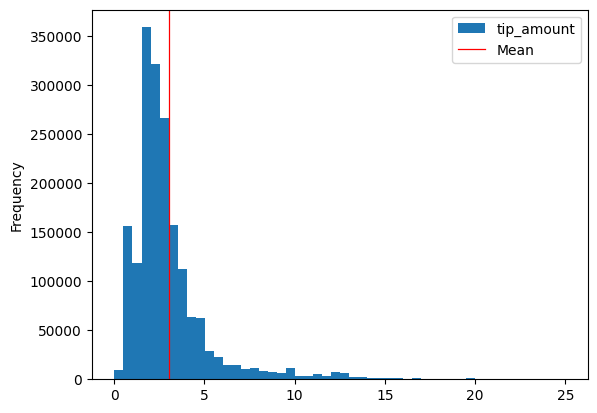

In [ ]:
df.plot.hist(column = 'tip_amount', bins = 50)
plt.axvline(df_mean, color = 'red', lw = 0.9, label = 'Mean')
plt.legend()

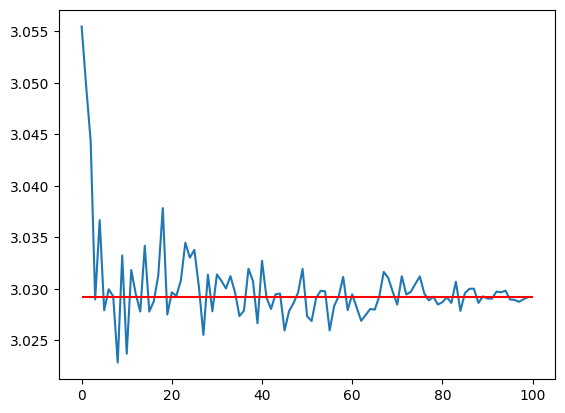

In [ ]:
plt.plot(means)
plt.hlines(xmin = 0, xmax = 100, color = 'red', y = df_mean)

In [ ]:

medians = []

print(f'--- Medians = {df_median} ---')

for i in range(1,101,1):
  probe = df['tip_amount'].sample(frac=i/100)
  m = probe.median()
  medians.append(m)

--- Medians = 2.45 ---


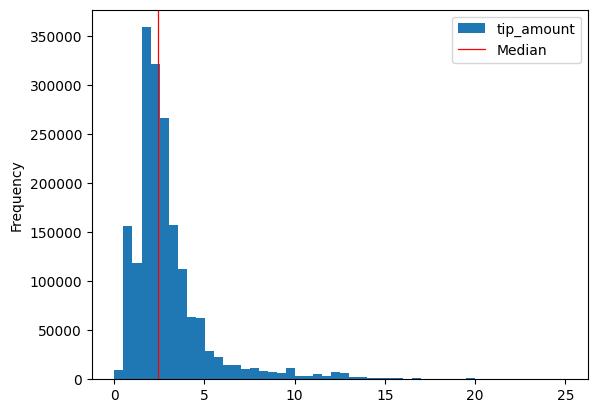

In [ ]:
df.plot.hist(column = 'tip_amount', bins = 50)
plt.axvline(df_median, color = 'red', lw = 0.9, label = 'Median')
plt.legend()

In [ ]:
print('Mean:', df_mean)
print('Median', df_median)
print('Mode:', df_mode)
print('Skew:', df_skew)

Mean: 3.0292011463727717
Median 2.45
Mode: 0    1.0
Name: tip_amount, dtype: float64
Skew: 3.0672566637706966


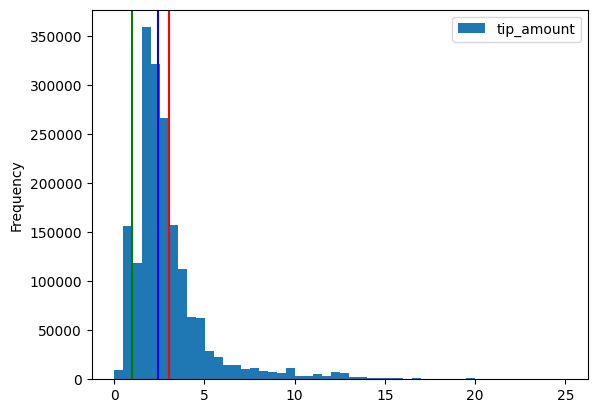

In [ ]:
df.plot.hist(column = 'tip_amount', bins = 50)
plt.axvline(df_mean, color = 'red')
plt.axvline(df_mode.loc[0], color = 'green')
plt.axvline(df_median, color = 'blue')

In [ ]:
!pip install scipy

In [ ]:
from scipy import stats
#truncated mean
tr_mean = stats.trim_mean(df['tip_amount'], 0.1)
print(f'trunacted mean = {tr_mean:.2f}')

trunacted mean = 2.61


In [ ]:
taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet',
 engine='auto', columns=['tip_amount','passenger_count'], storage_options=None,
use_nullable_dtypes=False)
taxi.query('tip_amount > 0 and tip_amount <= 20 and passenger_count > 0',
inplace=True)
print(taxi.describe())

/tmp/ipython-input-111-1917055516.py:1: FutureWarning: The argument 'use_nullable_dtypes' is deprecated and will be removed in a future version.
  taxi = pd.read_parquet('./yellow_tripdata_2021-05.parquet',


         tip_amount  passenger_count
count  1.712030e+06     1.712030e+06
mean   3.000728e+00     1.452504e+00
std    2.219205e+00     1.016095e+00
min    1.000000e-02     1.000000e+00
25%    1.860000e+00     1.000000e+00
50%    2.450000e+00     1.000000e+00
75%    3.360000e+00     1.000000e+00
max    2.000000e+01     9.000000e+00


In [ ]:
taxi.head()

,tip_amount,passenger_count
0,2.20,2.0
3,3.06,1.0
4,5.79,1.0
7,3.35,1.0
11,1.50,2.0


In [ ]:
from scipy import stats
trim_mean = stats.trim_mean(taxi['tip_amount'], 0.15) #30% truncated
weight_mean = np.average(taxi['tip_amount'], weights=taxi['passenger_count'])
mean = taxi['tip_amount'].mean()
print(f'Truncated mean = {trim_mean}, weighted average = {weight_mean}')
print(f'Truncated mean = {trim_mean:.2f}, weighted average = {weight_mean:.2f}')

Truncated mean = 2.539626992828903, weighted average = 3.016492305155766
Truncated mean = 2.54, weighted average = 3.02


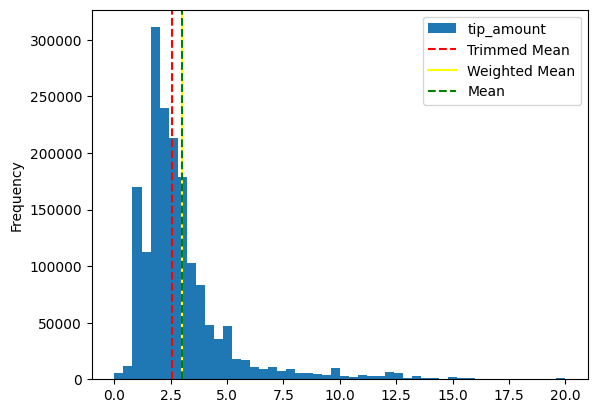

In [ ]:
taxi.plot.hist(column = 'tip_amount', bins = 50)
plt.axvline(x=trim_mean, color='red', linestyle='--', label='Trimmed Mean')
plt.axvline(x=weight_mean, color='yellow', label='Weighted Mean')
plt.axvline(x=mean, color='green', linestyle='--', label='Mean')
plt.legend()

# Mean = weightened mean